In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import os
from scipy.signal import savgol_filter, chirp, find_peaks, peak_widths
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

now = datetime.now()
dt_string = now.strftime("%Y/%m/%d %H:%M:%S")
print("Last update =", dt_string)	

Last update = 2022/04/28 09:46:49


In [2]:
def create_train(exp,df,method):
    outname = 'train.csv'
    outdir = f'../{exp}/data/train/{method}'
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    full_path = os.path.join(outdir, outname)
    df.to_csv(full_path,index=True)

def create_test(exp,df):
    outname = 'test.csv'
    outdir = f'../{exp}/data/test'
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    full_path = os.path.join(outdir, outname)
    df.to_csv(full_path,index=True)

def create_valid(exp,df):
    outname = 'valid.csv'
    outdir = f'../{exp}/data/valid'
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    full_path = os.path.join(outdir, outname)
    df.to_csv(full_path,index=True)

In [7]:
#path names-win
path_1 = r'./Colour-NH3-1223-01220-raw.csv'

#settings
kwargs = dict(header=0, index_col=0, parse_dates=False, squeeze=True)

#import csv files
df1 = pd.read_csv(path_1, **kwargs)

## Generate dataset

In [8]:
nh3 = df1.drop(columns='Colour')
colour = df1.drop(columns='NH3_N')
both = df1

### for NH3

In [9]:
nh3['SG-5'] = savgol_filter(nh3['NH3_N'], 5, 2)
nh3['SG-7'] = savgol_filter(nh3['NH3_N'], 7, 2)
nh3['SG-9'] = savgol_filter(nh3['NH3_N'], 9, 2)
nh3['EWMA-2'] = nh3['NH3_N'].ewm(span=2, adjust=False).mean()
nh3['EWMA-3'] = nh3['NH3_N'].ewm(span=3, adjust=False).mean()
nh3['EWMA-4'] = nh3['NH3_N'].ewm(span=4, adjust=False).mean()
nh3['Datetime'] = pd.to_datetime(df1.index, format = '%Y-%m-%d %H:%M')
nh3['date'] = nh3['Datetime'].dt.strftime('%m-%d')
nh3

,NH3_N,SG-5,SG-7,SG-9,EWMA-2,EWMA-3,EWMA-4,Datetime,date
Datetime,,,,,,,,,
2021-12-23 00:00:00,0.195660,0.193760,0.193263,0.222656,0.195660,0.195660,0.195660,2021-12-23 00:00:00,12-23
2021-12-23 01:00:00,0.196276,0.200999,0.201595,0.197314,0.196071,0.195968,0.195906,2021-12-23 01:00:00,12-23
2021-12-23 02:00:00,0.209842,0.207074,0.207769,0.183893,0.205252,0.202905,0.201481,2021-12-23 02:00:00,12-23
2021-12-23 03:00:00,0.213017,0.214102,0.211786,0.182393,0.210428,0.207961,0.206095,2021-12-23 03:00:00,12-23
2021-12-23 04:00:00,0.214757,0.213703,0.214343,0.192814,0.213314,0.211359,0.209560,2021-12-23 04:00:00,12-23
...,...,...,...,...,...,...,...,...,...
2022-01-22 19:00:00,0.377814,0.381410,0.371889,0.359854,0.407406,0.468348,0.531149,2022-01-22 19:00:00,01-22
2022-01-22 20:00:00,0.397088,0.381118,0.364582,0.301091,0.400527,0.432718,0.477525,2022-01-22 20:00:00,01-22
2022-01-22 21:00:00,0.346089,0.353162,0.337961,0.281378,0.364235,0.389403,0.424950,2022-01-22 21:00:00,01-22


In [10]:
nh3['NH3_N']

Datetime
2021-12-23 00:00:00    0.195660
2021-12-23 01:00:00    0.196276
2021-12-23 02:00:00    0.209842
2021-12-23 03:00:00    0.213017
2021-12-23 04:00:00    0.214757
                         ...   
2022-01-22 19:00:00    0.377814
2022-01-22 20:00:00    0.397088
2022-01-22 21:00:00    0.346089
2022-01-22 22:00:00    0.309749
2022-01-22 23:00:00    0.290475
Name: NH3_N, Length: 744, dtype: float64

In [11]:
nh3['SG-5'][72:72+72]

Datetime
2021-12-26 00:00:00    0.263574
2021-12-26 01:00:00    0.569554
2021-12-26 02:00:00    0.809205
2021-12-26 03:00:00    0.710903
2021-12-26 04:00:00    0.364515
                         ...   
2021-12-28 19:00:00    0.240578
2021-12-28 20:00:00    0.231574
2021-12-28 21:00:00    0.219652
2021-12-28 22:00:00    0.211477
2021-12-28 23:00:00    0.267231
Name: SG-5, Length: 72, dtype: float64

#### SG-filter

<ipython-input-12-feaa9d79a1b4>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t)


[]

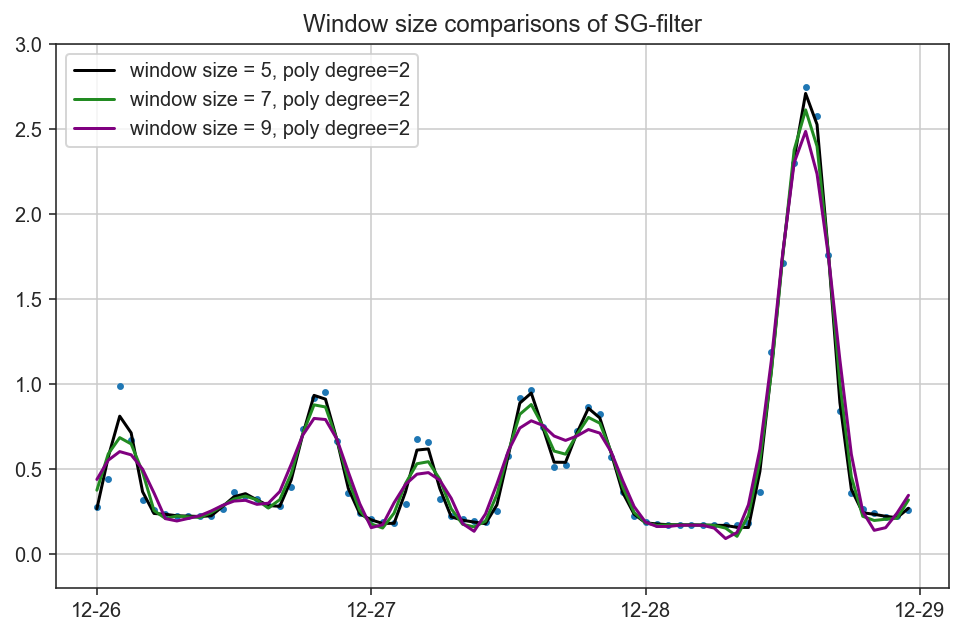

In [12]:
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(8,5))
plt.title('Window size comparisons of SG-filter')
c1='black'
c2='forestgreen'
c3='purple'
c4='darkorange'
l = 1.5
ax.plot(nh3['SG-5'][72:72+72],c=c1,linewidth=l,label='window size = 5, poly degree=2')
ax.plot(nh3['SG-7'][72:72+72],c=c2,linewidth=l,label='window size = 7, poly degree=2')
ax.plot(nh3['SG-9'][72:72+72],c=c3,linewidth=l,label='window size = 9, poly degree=2')

ax.scatter(np.arange(0,72),nh3['NH3_N'][72:72+72],s=6)

xmajorLocator = MultipleLocator(24)
ax.set_ylim(-0.2,3)
ax.xaxis.set_major_locator(xmajorLocator)
ax.grid(which='both')
# ax.margins(x=0.01)
t = pd.date_range(start='2021-12-25 00:00', periods=8, freq='1d').strftime('%m-%d')
ax.set_xticklabels(t)
ax.legend(loc='best')

plt.plot()
#plt.plot(df_SG_601_2)
#plt.plot(df_SG_301_2)
#plt.plot(df_SG_101_2)

#### EWMA filter

<ipython-input-13-87e5f7d67bed>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t)


[]

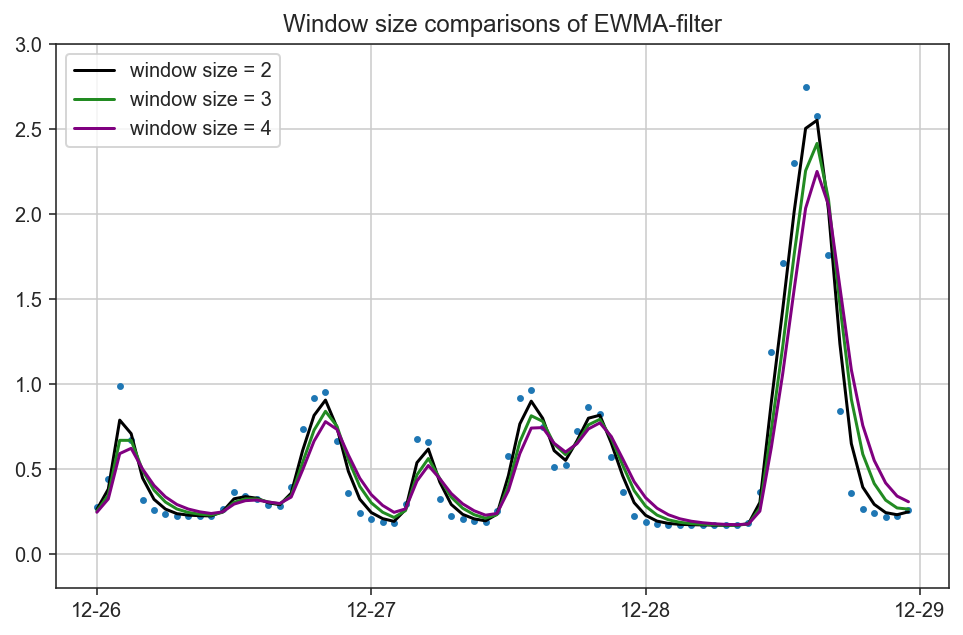

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('Window size comparisons of EWMA-filter')
c1='black'
c2='forestgreen'
c3='purple'
c4='darkorange'
l = 1.5
ax.plot(nh3['EWMA-2'][72:72+72],c=c1,linewidth=l,label='window size = 2')
ax.plot(nh3['EWMA-3'][72:72+72],c=c2,linewidth=l,label='window size = 3')
ax.plot(nh3['EWMA-4'][72:72+72],c=c3,linewidth=l,label='window size = 4')

ax.scatter(np.arange(0,72),nh3['NH3_N'][72:72+72],s=6)

xmajorLocator = MultipleLocator(24)
ax.set_ylim(-0.2,3)
ax.xaxis.set_major_locator(xmajorLocator)
ax.grid(which='both')
# ax.margins(x=0.01)
t = pd.date_range(start='2021-12-25 00:00', periods=8, freq='1d').strftime('%m-%d')
ax.set_xticklabels(t)
ax.legend(loc='best')

plt.plot()
#plt.plot(df_SG_601_2)
#plt.plot(df_SG_301_2)
#plt.plot(df_SG_101_2)

#### Outlier removal

##### create an arr with columns as days

In [14]:
length = 24
day_n = int(len(nh3)/length)
arr_NH3N = np.array(nh3['NH3_N'])
arr_NH3N_d = np.empty([length, day_n], dtype = float)
for day in range(day_n):
    for minute in range(length):
        arr_NH3N_d[minute, day] = arr_NH3N[minute + (day*length)]

In [26]:
length = 24
day_n = int(len(colour)/length)
arr_colour = np.array(colour['Colour'])
arr_colour_d = np.empty([length, day_n], dtype = float)
for day in range(day_n):
    for minute in range(length):
        arr_colour_d[minute, day] = arr_colour[minute + (day*length)]

In [58]:
from scipy import stats
stats.pearsonr(colour['Colour'], nh3['NH3_N'])

(0.11843437532549322, 0.0012103724316524659)

In [28]:
np.shape(arr_colour_d)

(24, 31)

In [15]:
np.shape(arr_NH3N_d)

(24, 31)

In [29]:
corr_sum = []
for i in range(31):
    corr = np.corrcoef(arr_colour_d[:,i], arr_NH3N_d[:,i])
    corr_sum.append(corr[0,1])

In [40]:
corr_sum_df = pd.DataFrame(np.round(corr_sum,3))
label_date = []
label_date = pd.date_range(start=nh3.index.min(), periods=day_n, freq='1d').strftime('%m-%d')
corr_sum_df.index = label_date
corr_sum_df

,0
12-23,0.008
12-24,-0.061
12-25,0.074
12-26,0.252
12-27,0.594
12-28,0.434
12-29,-0.041
12-30,0.351
12-31,0.041
01-01,0.333


In [55]:
for i in range(len(corr_sum_df)):
    if corr_sum_df.iloc[i,0] <= 0:
        print(corr_sum_df.index[i])

12-24
12-29
01-05
01-06
01-14
01-19


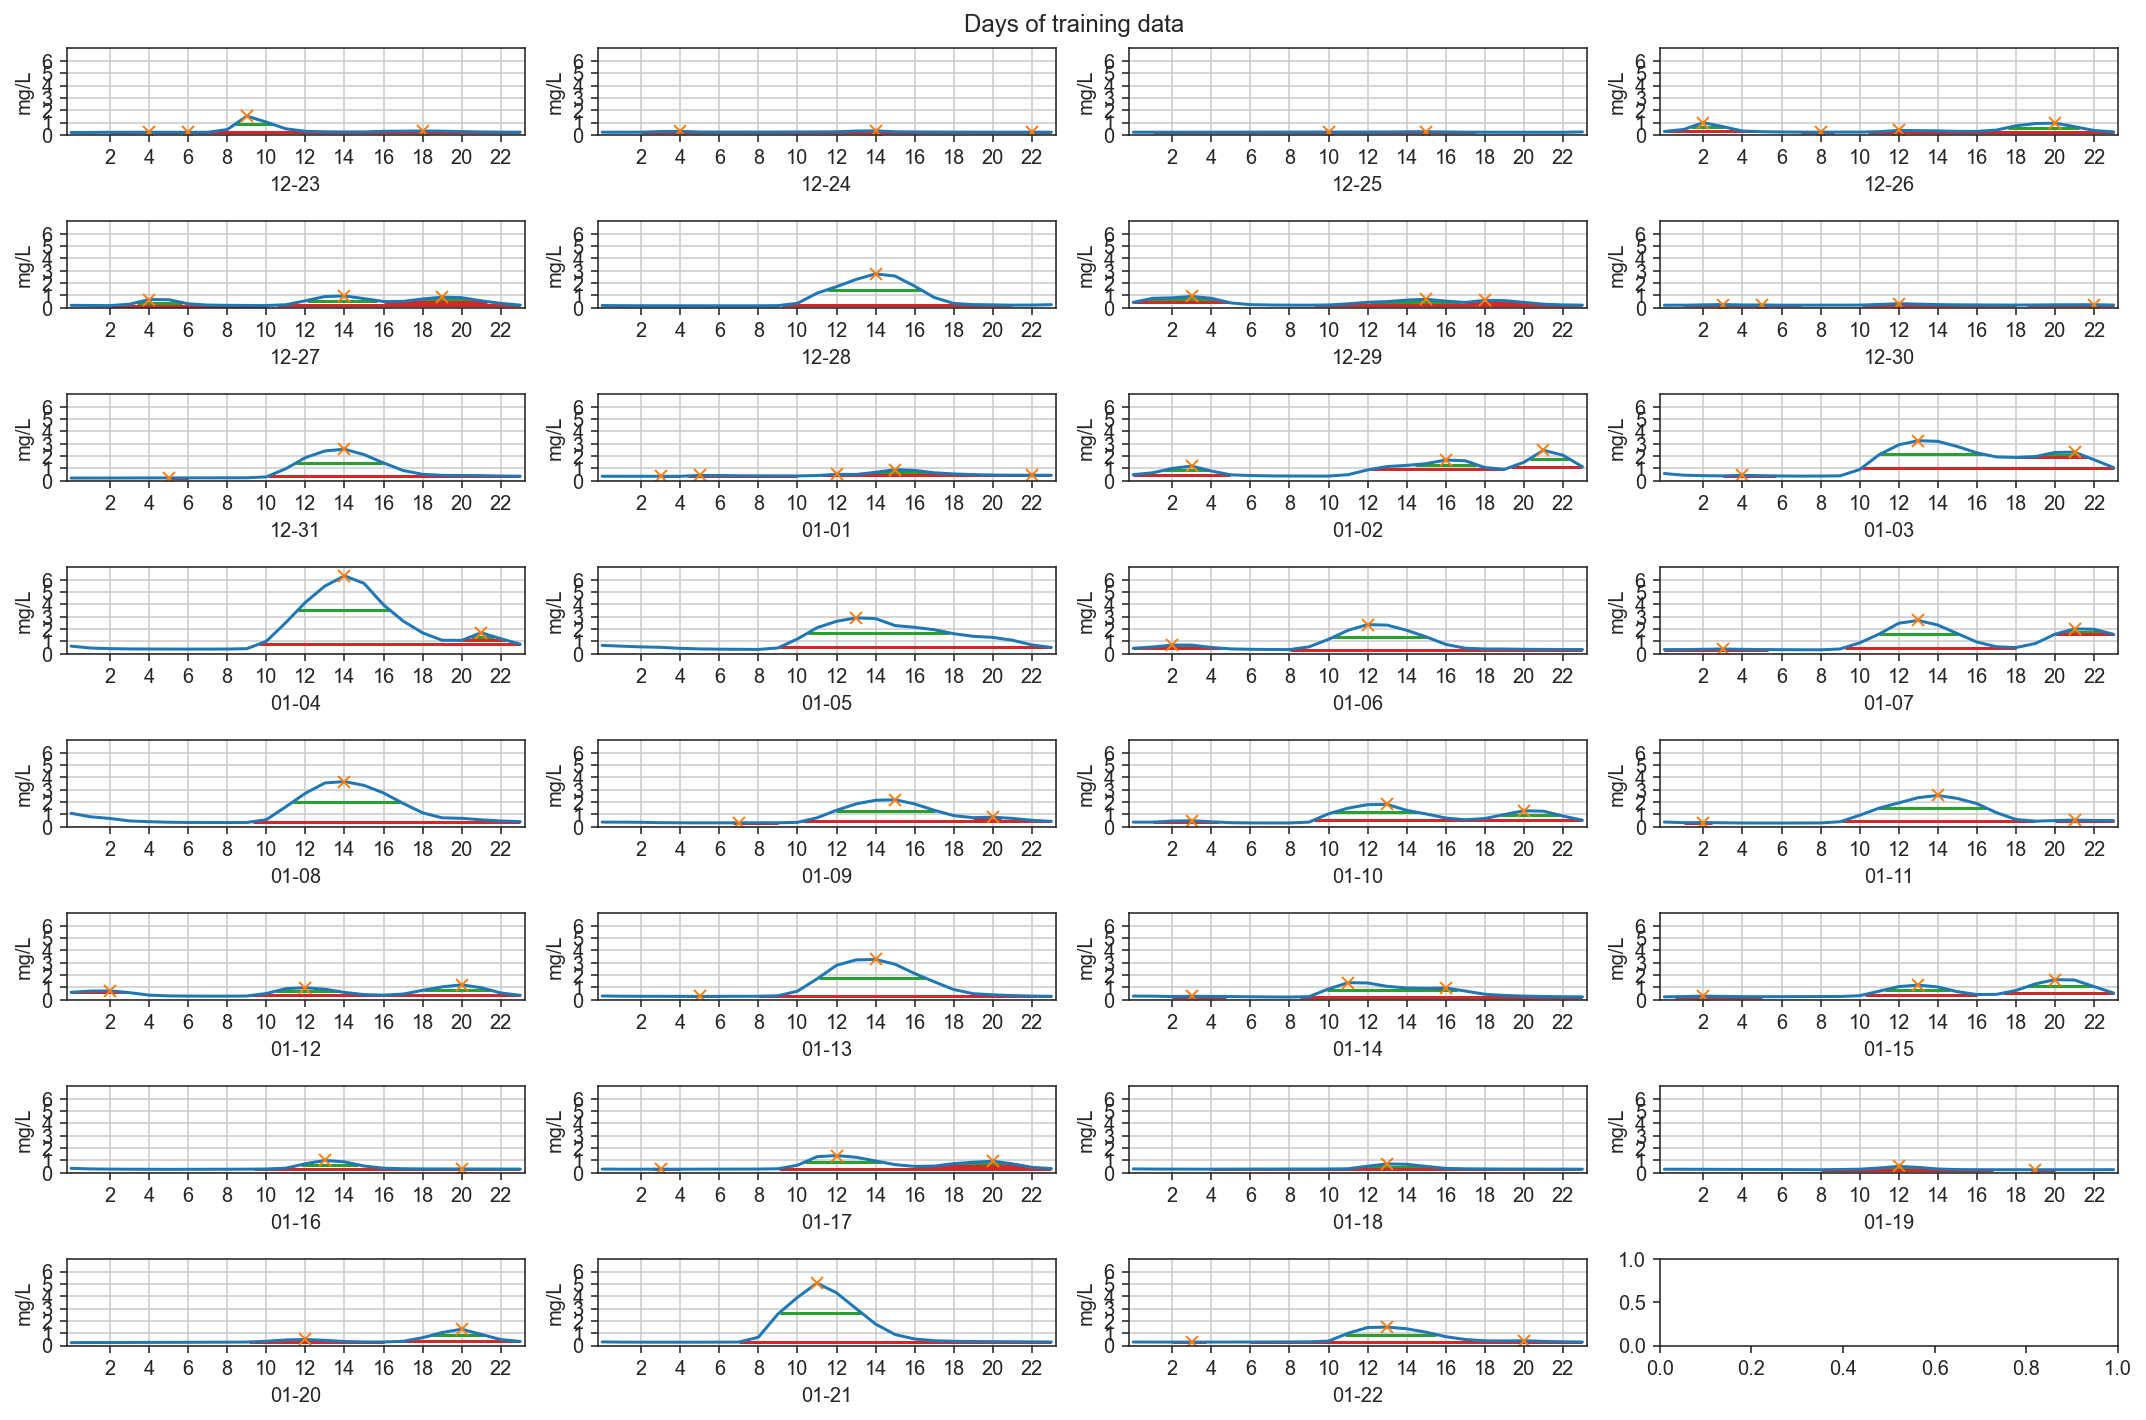

In [16]:
fig, ax = plt.subplots(8, 4, figsize=(15,10))
plt.suptitle('Days of training data')
ax = ax.flatten()
label_date = []
label_date = pd.date_range(start=nh3.index.min(), periods=day_n, freq='1d').strftime('%m-%d')

for i in range(day_n):
    peakx = arr_NH3N_d[:,i]
    peaks, _ = find_peaks(peakx)
    results_half = peak_widths(peakx, peaks, rel_height=0.5)
    results_full = peak_widths(peakx, peaks, rel_height=1)
    ax[i].plot(peakx)
    ax[i].plot(peaks, peakx[peaks], "x")
    ax[i].hlines(*results_half[1:], color="C2")
    ax[i].hlines(*results_full[1:], color="C3")
    ax[i].set_xlabel(f'{label_date[i]}')
    ax[i].set_ylim(0,7)
    ax[i].set_yticks(np.arange(0,7,1))
    ax[i].grid(which='both')
    ax[i].set_xticks(np.arange(2,25,2))
    ax[i].margins(x=0.01)
    ax[i].set_ylabel('mg/L')

plt.tight_layout()
plt.show()

In [17]:
# use dictionary to record the data of the day
dic_min_day = {}
dic_max_day = {}
dic_avg_bot_line = {}

length = 24
day_n = int(len(nh3)/length) #40 days

for i in range(day_n):
    peakx = arr_NH3N_d[:,i]
    peaks, _ = find_peaks(peakx)
    #max value (peak)
    dic_max_day[i] = max(peakx[peaks])
    #determine the index from the location list first
    results_full = peak_widths(peakx, peaks, rel_height=1)
    peaks_list = peakx[peaks].tolist()
    index_n = peaks_list.index(max(peaks_list))
    #min value (from the width)
    dic_min_day[i] = results_full[1][index_n]
    dic_avg_bot_line[i] = results_full[1].mean()

group = np.zeros([day_n,4], dtype = int) 

for i in range(day_n):
    #group days 
    #for column 1, condition 1 : if peak >= 0.5, output 1; else 0 (we dont want nh3 concentration to be too low)
    #for column 2, condition 2 : if max - min value >= 0.1, output1; else 0 (we want to exclude the low nh3 concentration but with peak patterns)
    #for column 3, condition 3 : if avg bottom line >= minimum peak value, output 1; else 0 (means the trend is concave down at some point and we dont want this)
    if dic_max_day[i] >= 0.5:
        group[i,0] = 1
    else:
        group[i,0] = 0

    if dic_max_day[i] - dic_min_day[i] >= 0.1:
        group[i,1] = 1
    else:
        group[i,1] = 0

    if dic_avg_bot_line[i] >= min(peakx[peaks]):
        group[i,2] = 1
    else:
        group[i,2] = 0
    
    group[i,3] = group[i,0] + group[i,1] + group[i,2]

df_group = pd.DataFrame()
df_group['tag'] = group[:,3]
df_group['date'] = pd.date_range(start=nh3.index.min(), periods=day_n, freq='1d')
df_group['date'] = df_group['date'].dt.strftime('%m-%d')

for i in range(day_n):
    if df_group['tag'][i] >= 2:
        df_group.loc[i,'label'] = 'Normal' #can directly create a new column
    else:
        df_group.loc[i,'label'] ='Abnormal'

for i in range(day_n):
    if df_group['label'][i] == 'Abnormal':
        print(df_group['date'][i])

#find the position of the abnormal days
i, c = np.where(df_group == 0)
i2, c2 = np.where(df_group == 1)
i_final = np.append(i,i2)
i_final_sorted = sorted(i_final)

df_or = pd.DataFrame()
df_or['NH3_N'] = nh3['NH3_N']
for x in i_final:
    df_or.iloc[x*24:(x+1)*24,0] = 0
# output
nh3['OR'] = df_or['NH3_N']

12-24
12-25
12-30


### for colour

In [18]:
colour['SG-5'] = savgol_filter(colour['Colour'], 5, 2)
colour['SG-7'] = savgol_filter(colour['Colour'], 7, 2)
colour['SG-9'] = savgol_filter(colour['Colour'], 9, 2)
colour['EWMA-2'] = colour['Colour'].ewm(span=2, adjust=False).mean()
colour['EWMA-3'] = colour['Colour'].ewm(span=3, adjust=False).mean()
colour['EWMA-4'] = colour['Colour'].ewm(span=4, adjust=False).mean()
colour['Datetime'] = pd.to_datetime(df1.index, format = '%Y-%m-%d %H:%M')
colour['date'] = colour['Datetime'].dt.strftime('%m-%d')
colour

,Colour,SG-5,SG-7,SG-9,EWMA-2,EWMA-3,EWMA-4,Datetime,date
Datetime,,,,,,,,,
2021-12-23 00:00:00,95.5,96.100000,96.190476,96.751515,95.500000,95.500000,95.500000,2021-12-23 00:00:00,12-23
2021-12-23 01:00:00,95.0,93.400000,93.392857,93.237879,95.166667,95.250000,95.300000,2021-12-23 01:00:00,12-23
2021-12-23 02:00:00,90.0,91.200000,91.107143,90.578139,91.722222,92.625000,93.180000,2021-12-23 02:00:00,12-23
2021-12-23 03:00:00,89.5,89.114286,89.333333,88.772294,90.240741,91.062500,91.708000,2021-12-23 03:00:00,12-23
2021-12-23 04:00:00,88.5,88.114286,87.476190,87.820346,89.080247,89.781250,90.424800,2021-12-23 04:00:00,12-23
...,...,...,...,...,...,...,...,...,...
2022-01-22 19:00:00,145.0,144.485714,144.047619,143.800866,144.058911,143.141670,142.286711,2022-01-22 19:00:00,01-22
2022-01-22 20:00:00,142.5,143.142857,143.333333,141.880736,143.019637,142.820835,142.372027,2022-01-22 20:00:00,01-22
2022-01-22 21:00:00,140.0,139.657143,139.678571,138.387013,141.006546,141.410418,141.423216,2022-01-22 21:00:00,01-22


#### SG Filter

<ipython-input-19-2134af86ef72>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t)


[]

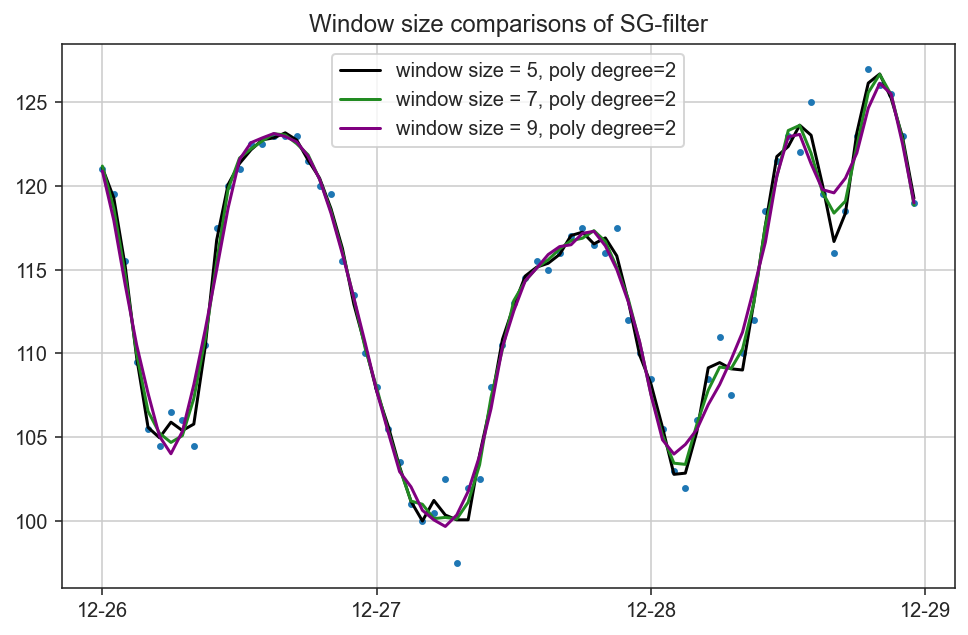

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('Window size comparisons of SG-filter')
c1='black'
c2='forestgreen'
c3='purple'
c4='darkorange'
l = 1.5
ax.plot(colour['SG-5'][72:72+72],c=c1,linewidth=l,label='window size = 5, poly degree=2')
ax.plot(colour['SG-7'][72:72+72],c=c2,linewidth=l,label='window size = 7, poly degree=2')
ax.plot(colour['SG-9'][72:72+72],c=c3,linewidth=l,label='window size = 9, poly degree=2')

ax.scatter(np.arange(0,72),colour['Colour'][72:72+72],s=6)

xmajorLocator = MultipleLocator(24)
# ax.set_ylim(-0.2,3)
ax.xaxis.set_major_locator(xmajorLocator)
ax.grid(which='both')
# ax.margins(x=0.01)
t = pd.date_range(start='2021-12-25 00:00', periods=8, freq='1d').strftime('%m-%d')
ax.set_xticklabels(t)
ax.legend(loc='best')

plt.plot()
#plt.plot(df_SG_601_2)
#plt.plot(df_SG_301_2)
#plt.plot(df_SG_101_2)

#### EWMA filter

<ipython-input-20-b4c63e88674d>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(t)


[]

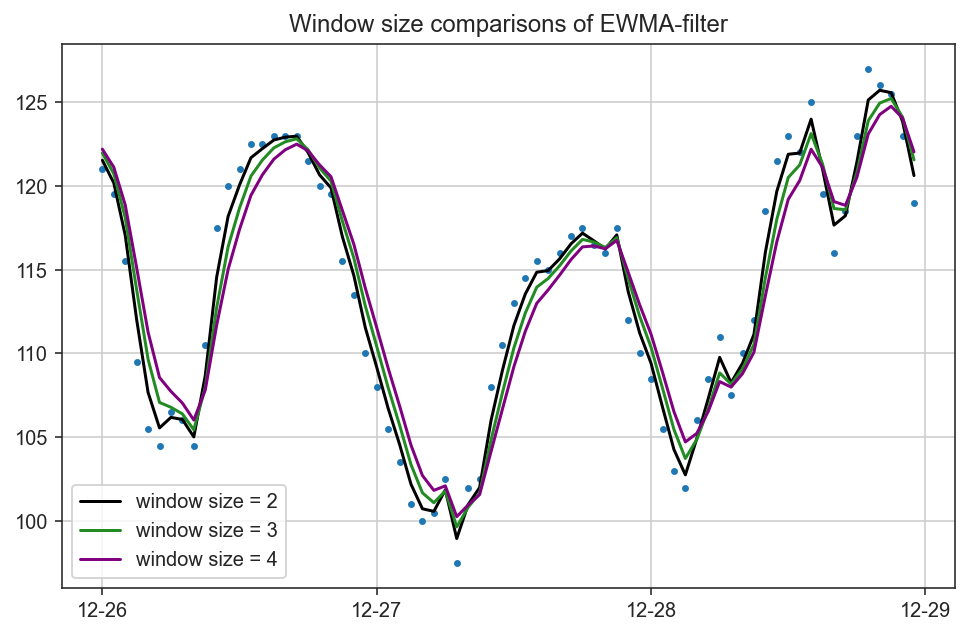

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('Window size comparisons of EWMA-filter')
c1='black'
c2='forestgreen'
c3='purple'
c4='darkorange'
l = 1.5
ax.plot(colour['EWMA-2'][72:72+72],c=c1,linewidth=l,label='window size = 2')
ax.plot(colour['EWMA-3'][72:72+72],c=c2,linewidth=l,label='window size = 3')
ax.plot(colour['EWMA-4'][72:72+72],c=c3,linewidth=l,label='window size = 4')

ax.scatter(np.arange(0,72),colour['Colour'][72:72+72],s=6)

xmajorLocator = MultipleLocator(24)
# ax.set_ylim(-0.2,3)
ax.xaxis.set_major_locator(xmajorLocator)
ax.grid(which='both')
# ax.margins(x=0.01)
t = pd.date_range(start='2021-12-25 00:00', periods=8, freq='1d').strftime('%m-%d')
ax.set_xticklabels(t)
ax.legend(loc='best')

plt.plot()
#plt.plot(df_SG_601_2)
#plt.plot(df_SG_301_2)
#plt.plot(df_SG_101_2)

In [21]:
nh3.index = pd.to_datetime(nh3.index, format = '%Y-%m-%d %H:%M')
colour.index = pd.to_datetime(colour.index, format = '%Y-%m-%d %H:%M')

## Exp1

In [22]:
nh3

,NH3_N,SG-5,SG-7,SG-9,EWMA-2,EWMA-3,EWMA-4,Datetime,date,OR
Datetime,,,,,,,,,,
2021-12-23 00:00:00,0.195660,0.193760,0.193263,0.222656,0.195660,0.195660,0.195660,2021-12-23 00:00:00,12-23,0.195660
2021-12-23 01:00:00,0.196276,0.200999,0.201595,0.197314,0.196071,0.195968,0.195906,2021-12-23 01:00:00,12-23,0.196276
2021-12-23 02:00:00,0.209842,0.207074,0.207769,0.183893,0.205252,0.202905,0.201481,2021-12-23 02:00:00,12-23,0.209842
2021-12-23 03:00:00,0.213017,0.214102,0.211786,0.182393,0.210428,0.207961,0.206095,2021-12-23 03:00:00,12-23,0.213017
2021-12-23 04:00:00,0.214757,0.213703,0.214343,0.192814,0.213314,0.211359,0.209560,2021-12-23 04:00:00,12-23,0.214757
...,...,...,...,...,...,...,...,...,...,...
2022-01-22 19:00:00,0.377814,0.381410,0.371889,0.359854,0.407406,0.468348,0.531149,2022-01-22 19:00:00,01-22,0.377814
2022-01-22 20:00:00,0.397088,0.381118,0.364582,0.301091,0.400527,0.432718,0.477525,2022-01-22 20:00:00,01-22,0.397088
2022-01-22 21:00:00,0.346089,0.353162,0.337961,0.281378,0.364235,0.389403,0.424950,2022-01-22 21:00:00,01-22,0.346089


In [23]:
#Train is from 12/23 to 1/15 (24 days)
#Test is from 1/16 to 1/22 (7 days)
# exp1_train_obs = nh3['NH3_N']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_sg5 = nh3['SG-5']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_sg7 = nh3['SG-7']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_sg9 = nh3['SG-9']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_ew2 = nh3['EWMA-2']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_ew3 = nh3['EWMA-3']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_ew4 = nh3['EWMA-4']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_train_or = nh3['OR']['2021-12-23 00:00':'2022-01-15 23:00']
# exp1_test = nh3['NH3_N']['2022-01-16 0:00':'2022-1-22 23:00']
# 
# exp1_train_obs =pd.DataFrame(exp1_train_obs)
# exp1_train_sg5 =pd.DataFrame(exp1_train_sg5)
# exp1_train_sg7 =pd.DataFrame(exp1_train_sg7)
# exp1_train_sg9 =pd.DataFrame(exp1_train_sg9)
# exp1_train_ew2 = pd.DataFrame(exp1_train_ew2)
# exp1_train_ew3 =pd.DataFrame(exp1_train_ew3)
# exp1_train_ew4 = pd.DataFrame(exp1_train_ew4)
# exp1_train_or = pd.DataFrame(exp1_train_or)
# exp1_test= pd.DataFrame(exp1_test)
# 
# exp1_train_sg5.columns = ['NH3_N']
# exp1_train_sg7.columns = ['NH3_N']
# exp1_train_sg9.columns = ['NH3_N']
# exp1_train_ew2.columns = ['NH3_N']
# exp1_train_ew3.columns = ['NH3_N']
# exp1_train_ew4.columns = ['NH3_N']
# exp1_train_or.columns = ['NH3_N']

### Export Exp1

In [24]:
# create_train('Exp-1',exp1_train_obs,'obs')
# create_train('Exp-1',exp1_train_sg5,'sg5')
# create_train('Exp-1',exp1_train_sg7,'sg7')
# create_train('Exp-1',exp1_train_sg9,'sg9')
# create_train('Exp-1',exp1_train_ew2,'ew2')
# create_train('Exp-1',exp1_train_ew3,'ew3')
# create_train('Exp-1',exp1_train_ew4,'ew4')
# create_train('Exp-1',exp1_train_or,'or')
# create_test('Exp-1',exp1_test)
# 
# create_train('Exp-1.1',exp1_train_obs,'obs')
# create_train('Exp-1.1',exp1_train_sg5,'sg5')
# create_train('Exp-1.1',exp1_train_sg7,'sg7')
# create_train('Exp-1.1',exp1_train_sg9,'sg9')
# create_train('Exp-1.1',exp1_train_ew2,'ew2')
# create_train('Exp-1.1',exp1_train_ew3,'ew3')
# create_train('Exp-1.1',exp1_train_ew4,'ew4')
# create_train('Exp-1.1',exp1_train_or,'or')
# create_test('Exp-1.1',exp1_test)

## Exp2

same as Exp1

In [ ]:
# create_train('Exp-2',exp1_train_obs,'obs')
# create_train('Exp-2',exp1_train_sg5,'sg5')
# create_train('Exp-2',exp1_train_sg7,'sg7')
# create_train('Exp-2',exp1_train_sg9,'sg9')
# create_train('Exp-2',exp1_train_ew2,'ew2')
# create_train('Exp-2',exp1_train_ew3,'ew3')
# create_train('Exp-2',exp1_train_ew4,'ew4')
# create_train('Exp-2',exp1_train_or,'or')
# create_test('Exp-2',exp1_test)

## Exp3

In [ ]:
colour

In [ ]:
# Colour predict colour
# exp3_train_obs = colour['Colour']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_sg5 = colour['SG-5']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_sg7 = colour['SG-7']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_sg9 = colour['SG-9']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_ew2 = colour['EWMA-2']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_ew3 = colour['EWMA-3']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_train_ew4 = colour['EWMA-4']['2021-12-23 00:00':'2022-01-15 23:00']
# exp3_test = colour['Colour']['2022-01-16 0:00':'2022-1-22 23:00']
# 
# exp3_train_obs =pd.DataFrame(exp1_train_obs)
# exp3_train_sg5 =pd.DataFrame(exp1_train_sg5)
# exp3_train_sg7 =pd.DataFrame(exp1_train_sg7)
# exp3_train_sg9 =pd.DataFrame(exp1_train_sg9)
# exp3_train_ew2 = pd.DataFrame(exp1_train_ew2)
# exp3_train_ew3 =pd.DataFrame(exp1_train_ew3)
# exp3_train_ew4 = pd.DataFrame(exp1_train_ew4)
# exp3_test= pd.DataFrame(exp1_test)
# 
# exp3_train_sg5.columns = ['Colour']
# exp3_train_sg7.columns = ['Colour']
# exp3_train_sg9.columns = ['Colour']
# exp3_train_ew2.columns = ['Colour']
# exp3_train_ew3.columns = ['Colour']
# exp3_train_ew4.columns = ['Colour']
# 
# create_train('Exp-3',exp3_train_obs,'obs')
# create_train('Exp-3',exp3_train_sg5,'sg5')
# create_train('Exp-3',exp3_train_sg7,'sg7')
# create_train('Exp-3',exp3_train_sg9,'sg9')
# create_train('Exp-3',exp3_train_ew2,'ew2')
# create_train('Exp-3',exp3_train_ew3,'ew3')
# create_train('Exp-3',exp3_train_ew4,'ew4')
# create_test('Exp-3',exp3_test)

In [ ]:
# exp3_train_sg5.columns

## Exp4

In [ ]:
# Colour and NH3 predict NH3/Colour
# exp4_train = raw_both['2021-12-23 00:00':'2022-01-11 23:00']
# exp4_val = raw_both['2022-1-12 00:00':'2022-1-16 23:00']
# exp4_test = raw_both['2022-01-17 0:00':'2022-1-22 23:00']
exp4_train_obs = nh3['NH3_N']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_sg5 = nh3['SG-5']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_sg7 = nh3['SG-7']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_sg9 = nh3['SG-9']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_ew2 = nh3['EWMA-2']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_ew3 = nh3['EWMA-3']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_ew4 = nh3['EWMA-4']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_train_or = nh3['OR']['2021-12-23 00:00':'2022-01-09 23:00']
exp4_valid = nh3['NH3_N']['2022-1-10 00:00':'2022-1-15 23:00']
exp4_test = nh3['NH3_N']['2022-01-16 0:00':'2022-1-22 23:00']

exp4_train_obs =pd.DataFrame(exp4_train_obs)
exp4_train_sg5 =pd.DataFrame(exp4_train_sg5)
exp4_train_sg7 =pd.DataFrame(exp4_train_sg7)
exp4_train_sg9 =pd.DataFrame(exp4_train_sg9)
exp4_train_ew2 = pd.DataFrame(exp4_train_ew2)
exp4_train_ew3 =pd.DataFrame(exp4_train_ew3)
exp4_train_ew4 = pd.DataFrame(exp4_train_ew4)
exp4_train_or = pd.DataFrame(exp4_train_or)

exp4_test= pd.DataFrame(exp4_test)
exp4_valid= pd.DataFrame(exp4_valid)

exp4_train_sg5.columns = ['NH3_N']
exp4_train_sg7.columns = ['NH3_N']
exp4_train_sg9.columns = ['NH3_N']
exp4_train_ew2.columns = ['NH3_N']
exp4_train_ew3.columns = ['NH3_N']
exp4_train_ew4.columns = ['NH3_N']
exp4_train_or.columns = ['NH3_N']

create_train('Exp-4-with-val',exp4_train_obs,'obs')
create_train('Exp-4-with-val',exp4_train_sg5,'sg5')
create_train('Exp-4-with-val',exp4_train_sg7,'sg7')
create_train('Exp-4-with-val',exp4_train_sg9,'sg9')
create_train('Exp-4-with-val',exp4_train_ew2,'ew2')
create_train('Exp-4-with-val',exp4_train_ew3,'ew3')
create_train('Exp-4-with-val',exp4_train_ew4,'ew4')
create_train('Exp-4-with-val',exp4_train_or,'or')
create_test('Exp-4-with-val',exp4_test)
create_valid('Exp-4-with-val',exp4_valid)

# Exp-5

In [ ]:
# Colour and NH3 predict NH3/Colour
# exp4_train = raw_both['2021-12-23 00:00':'2022-01-11 23:00']
# exp4_val = raw_both['2022-1-12 00:00':'2022-1-16 23:00']
# exp4_test = raw_both['2022-01-17 0:00':'2022-1-22 23:00']
exp5_train_obs = colour['Colour']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_sg5 = colour['SG-5']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_sg7 = colour['SG-7']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_sg9 = colour['SG-9']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_ew2 = colour['EWMA-2']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_ew3 = colour['EWMA-3']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_train_ew4 = colour['EWMA-4']['2021-12-23 00:00':'2022-01-09 23:00']
exp5_valid = colour['Colour']['2022-1-10 00:00':'2022-1-15 23:00']
exp5_test = colour['Colour']['2022-01-16 0:00':'2022-1-22 23:00']

exp5_train_obs =pd.DataFrame(exp5_train_obs)
exp5_train_sg5 =pd.DataFrame(exp5_train_sg5)
exp5_train_sg7 =pd.DataFrame(exp5_train_sg7)
exp5_train_sg9 =pd.DataFrame(exp5_train_sg9)
exp5_train_ew2 = pd.DataFrame(exp5_train_ew2)
exp5_train_ew3 =pd.DataFrame(exp5_train_ew3)
exp5_train_ew4 = pd.DataFrame(exp5_train_ew4)

exp5_test= pd.DataFrame(exp5_test)
exp5_valid= pd.DataFrame(exp5_valid)

exp5_train_sg5.columns = ['Colour']
exp5_train_sg7.columns = ['Colour']
exp5_train_sg9.columns = ['Colour']
exp5_train_ew2.columns = ['Colour']
exp5_train_ew3.columns = ['Colour']
exp5_train_ew4.columns = ['Colour']

create_train('Exp-5-colour',exp5_train_obs,'obs')
create_train('Exp-5-colour',exp5_train_sg5,'sg5')
create_train('Exp-5-colour',exp5_train_sg7,'sg7')
create_train('Exp-5-colour',exp5_train_sg9,'sg9')
create_train('Exp-5-colour',exp5_train_ew2,'ew2')
create_train('Exp-5-colour',exp5_train_ew3,'ew3')
create_train('Exp-5-colour',exp5_train_ew4,'ew4')
create_test('Exp-5-colour',exp5_test)
create_valid('Exp-5-colour',exp5_valid)

# Exp 7

In [40]:
# Colour and NH3 predict NH3/Colour
# exp4_train = raw_both['2021-12-23 00:00':'2022-01-11 23:00']
# exp4_val = raw_both['2022-1-12 00:00':'2022-1-16 23:00']
# exp4_test = raw_both['2022-01-17 0:00':'2022-1-22 23:00']
exp7_train_obs = nh3['NH3_N']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg5 = nh3['SG-5']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg7 = nh3['SG-7']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg9 = nh3['SG-9']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew2 = nh3['EWMA-2']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew3 = nh3['EWMA-3']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew4 = nh3['EWMA-4']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_or = nh3['OR']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_valid = nh3['NH3_N']['2022-1-10 00:00':'2022-1-15 23:00']
exp7_test = nh3['NH3_N']['2022-01-16 0:00':'2022-1-22 23:00']

exp7_train_obs = pd.DataFrame(exp7_train_obs)
exp7_train_sg5 = pd.DataFrame(exp7_train_sg5)
exp7_train_sg7 = pd.DataFrame(exp7_train_sg7)
exp7_train_sg9 = pd.DataFrame(exp7_train_sg9)
exp7_train_ew2 = pd.DataFrame(exp7_train_ew2)
exp7_train_ew3 = pd.DataFrame(exp7_train_ew3)
exp7_train_ew4 = pd.DataFrame(exp7_train_ew4)
exp7_train_or =  pd.DataFrame(exp7_train_or)
exp7_test = pd.DataFrame(exp7_test)
exp7_valid = pd.DataFrame(exp7_valid)

exp7_train_sg5.columns = ['NH3_N']
exp7_train_sg7.columns = ['NH3_N']
exp7_train_sg9.columns = ['NH3_N']
exp7_train_ew2.columns = ['NH3_N']
exp7_train_ew3.columns = ['NH3_N']
exp7_train_ew4.columns = ['NH3_N']
exp7_test.columns = ['NH3_N']
exp7_valid.columns = ['NH3_N']


exp7_train_obs['Colour'] = colour['Colour']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg5['Colour'] = colour['SG-5']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg7['Colour'] = colour['SG-7']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_sg9['Colour'] = colour['SG-9']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew2['Colour'] = colour['EWMA-2']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew3['Colour'] = colour['EWMA-3']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_train_ew4['Colour'] = colour['EWMA-4']['2021-12-23 00:00':'2022-01-09 23:00']
exp7_valid['Colour'] = colour['Colour']['2022-1-10 00:00':'2022-1-15 23:00']
exp7_test['Colour'] = colour['Colour']['2022-01-16 0:00':'2022-1-22 23:00']

In [43]:
create_train('Exp-7',exp7_train_obs,'obs')
create_train('Exp-7',exp7_train_sg5,'sg5')
create_train('Exp-7',exp7_train_sg7,'sg7')
create_train('Exp-7',exp7_train_sg9,'sg9')
create_train('Exp-7',exp7_train_ew2,'ew2')
create_train('Exp-7',exp7_train_ew3,'ew3')
create_train('Exp-7',exp7_train_ew4,'ew4')
create_test('Exp-7',exp7_test)
create_valid('Exp-7',exp7_valid)